# Multiple Linear Regression

## Bike Sharing - Demand Prediction

### Problem Statement

A bike-sharing provider has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, the company aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends. 


The company wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
Bike Demand has to be modelled with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Steps for Model Building
1. Reading and Understanding Data  
2. Visualising the Data  
3. Data Preparation  
4. Splitting the Data into Training and Testing Sets  
5. Feature Scaling on the train data 
6. Building the Model  
7. Residual Analysis of the train data  
8. Making predictions using final model  
9. Model Evaluation

## Step 1: Reading and Understanding the Data

### Importing Required Libraries

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#statsmodels Libraries

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#sk learn Libraries

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# to get the months name

import calendar

In [2]:
## reading data
bikeDF = pd.read_csv('day.csv')
bikeDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Understanding Data

In [6]:
# Checking shape of the bike data
bikeDF.shape

(730, 16)

In [7]:
# getting info on the data frame
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking for null data
bikeDF.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# checking the spread of data and SD, Mean, Median and mode
bikeDF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# checking the number of unique values in all columns
bikeDF.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### As we can see season, year, month, holiday, weekday, working    day and weathersit are categorical data and others are continuous data

In [11]:
# getting uniques value list for the categorical data
catVars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for i in range(len(catVars)):
    print("The uniques Value for {0} : {1}".format(catVars[i], bikeDF[catVars[i]].unique()))

The uniques Value for season : [1 2 3 4]
The uniques Value for yr : [0 1]
The uniques Value for mnth : [ 1  2  3  4  5  6  7  8  9 10 11 12]
The uniques Value for holiday : [0 1]
The uniques Value for weekday : [6 0 1 2 3 4 5]
The uniques Value for workingday : [0 1]
The uniques Value for weathersit : [2 1 3]


### Checking Correlaton of numerical data

In [12]:
# getting the correlation data on Numerical data
bikeDF.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


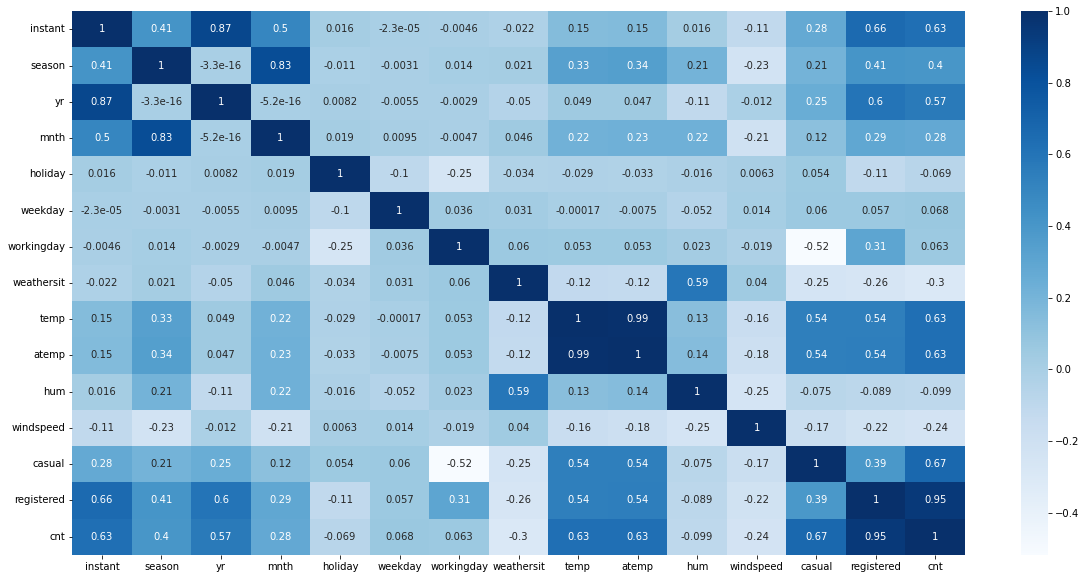

In [13]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bikeDF.corr(), annot = True, cmap="Blues")
plt.show()

From the HeatMap, we can check that the features temp, atemp, yr, season, weathersit, mnth, windspeed have high correlation with the dependent variable 'cnt'. Windspeed and Weathersit have negative correlation with 'cnt'.

### Updating Categorical Data with Proper Values

1. mnth - [janaury, february, march, april, may, june, july, august, spetember, october, november, december]
2. season - [spring, summer, fall, winter]
3. weathersit - ['Clear', 'Mist & Cloudy', 'Light Snow & Rain', 'Heavy Snow & Rain']
4. weekday - [sunday, moday, tuesday, wednesday, thursday, friday, saturday]

In [15]:
# Converting categorical data to meaningful values
bikeDF['mnth'] = bikeDF.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July', 8:'August',9:'September',10:'October',11:'November',12:'December'})
bikeDF.season = bikeDF.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
bikeDF.weathersit = bikeDF.weathersit.map({1:'Clear',2:'Mist_Cloudy', 
                                             3:'Light_Snow_Rain',4:'Heavy_Snow_Rain'})
bikeDF.weekday = bikeDF.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",
                                     4:"Thrusday",5:"Friday",6:"Saturday"})

bikeDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising Data

### Visualising Numerical Data


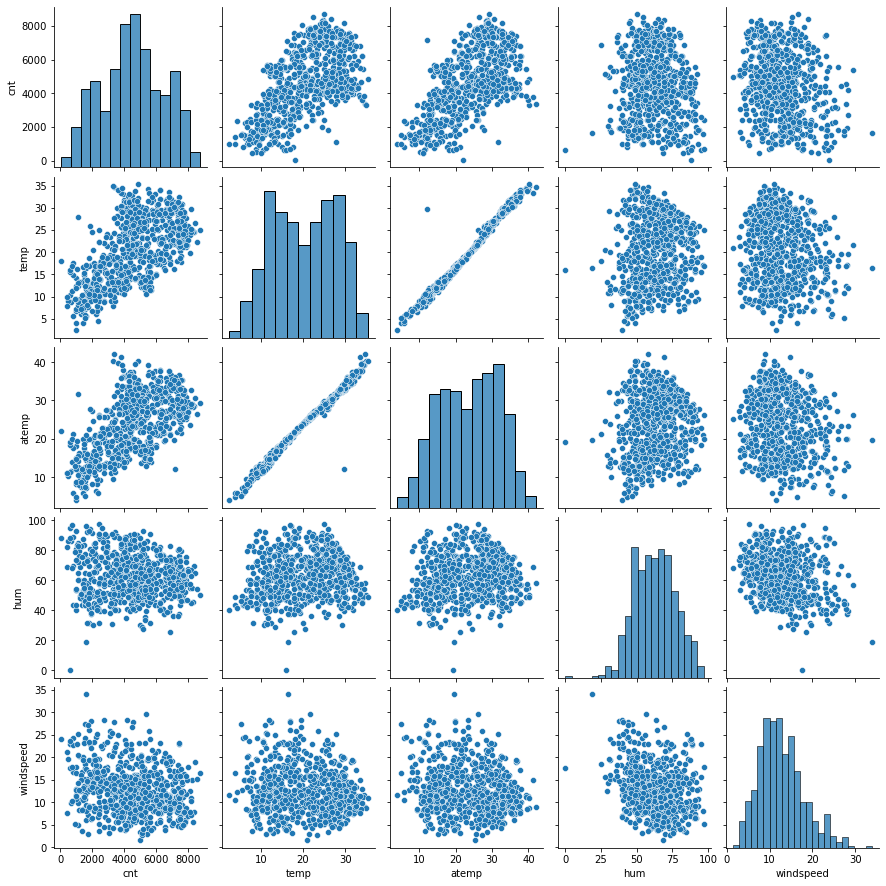

In [16]:
sns.pairplot(data=bikeDF,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Visualising Categorical Data

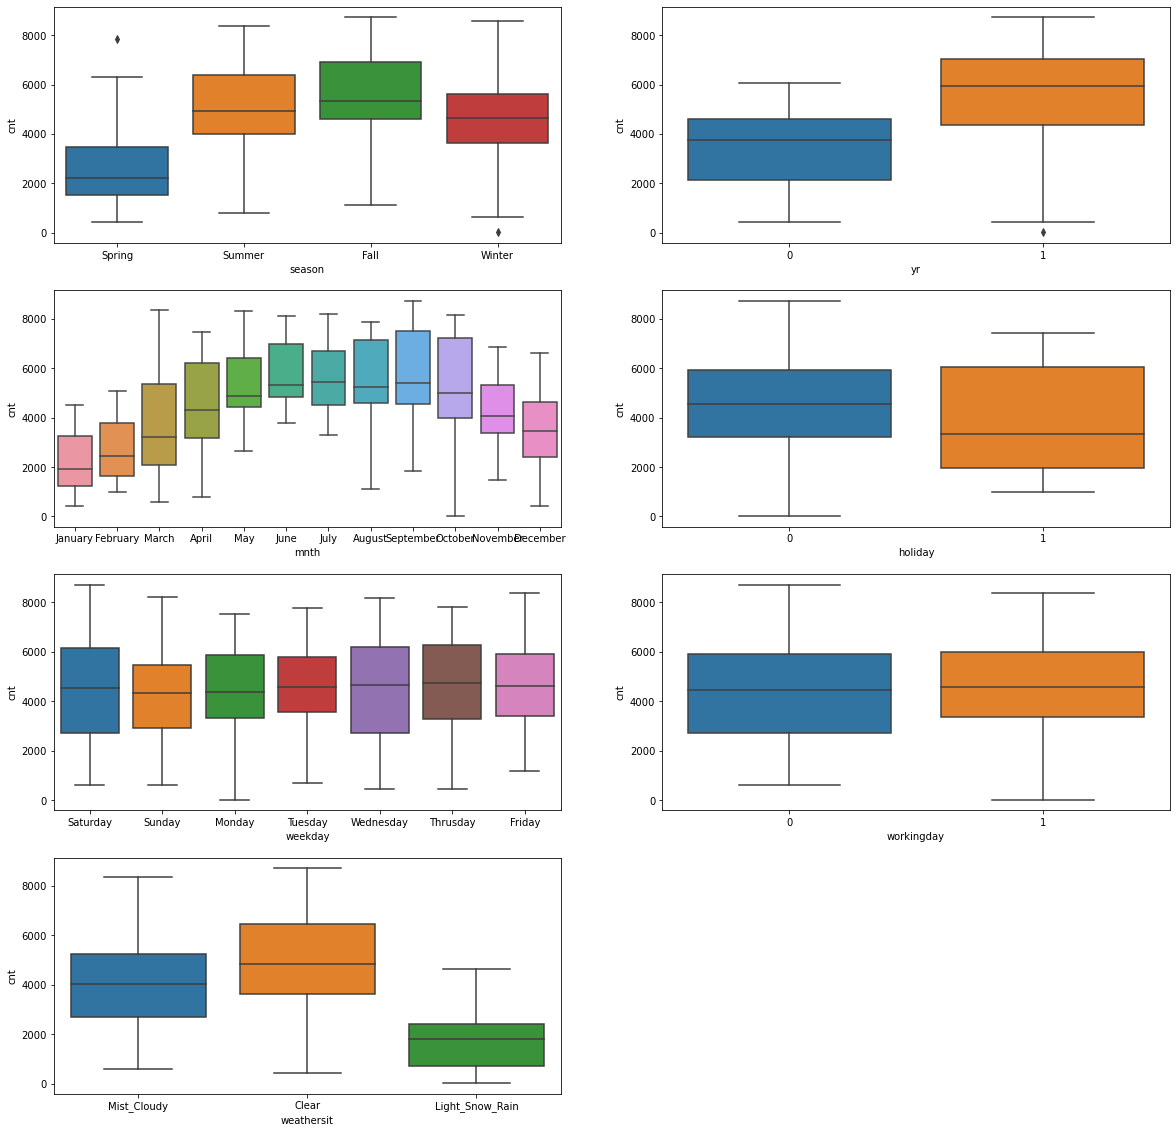

In [17]:
plt.figure(figsize=(20, 20))

catVars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for i in range(len(catVars)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=catVars[i], y='cnt', data=bikeDF)

Based on the above graphs, we can see that:
1. season - Spring has least demand, while Fall, Summer and Winter has high demands (in same order)
2. yr - There is a very high year on year increase in demand.
3. mnth - May through October has very good demand while January has the lowest demand.
4. holiday - On holidays, the demands are less but variance is more.
5. weathersit - Clear and moderate (mist and cloudy) weathers, the demands are good. the demand is least in Light Snowy and light rain weather. there are no demand on extreme (Heavy Snow & Rain) weather condition.

## Step 3: Data Preparation

### Dropping irrelevant columns

In [19]:
## dropping columns that are irrelevant for the model - 
# 1. instant - it is index for the data, hence not required.
# 2. dteday - it represents date but since we already have the month and yesr and weekday or holiday, it is not required.
# 3. casual - one of dependent variable and 'cnt' provides cummulative data of casual and registered user. So it can be dropped.
# 4. registered - one of dependent variable and 'cnt' provides cummulative data of casual and registered user. So it can be dropped.

bikeDF.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bikeDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy Variables for categorical data

In [21]:
# creating dummy variables for "season","mnth","weekday","weathersit"
bikeDF = pd.get_dummies(data=bikeDF,columns=["season","mnth","weekday","weathersit"],drop_first=True)
bikeDF.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    uint8  
 9   season_Summer               730 non-null    uint8  
 10  season_Winter               730 non-null    uint8  
 11  mnth_August                 730 non-null    uint8  
 12  mnth_December               730 non-null    uint8  
 13  mnth_February               730 non

## Step 4: Splitting data into Training and Testing Sets

### Train - Test Split
The data is split into Train sets and Test sets in the ratio of 70:30. The random_state is kept at 25. Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.

In [23]:
train, test = train_test_split(bikeDF, train_size = 0.7, test_size = 0.3, random_state = 25)

In [24]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
625,1,0,1,25.556653,28.25335,87.2500,23.958329,4073,0,0,...,0,1,0,0,0,0,1,0,0,1
698,1,0,1,12.231653,16.19335,64.9583,3.917544,5668,0,0,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,23.062500,26.80000,86.7083,10.249593,4553,0,1,...,0,0,0,0,1,0,0,0,0,1
528,1,0,1,26.889153,30.55585,58.2083,22.999693,7421,0,1,...,0,0,0,0,0,0,0,1,0,0
722,1,0,1,9.483464,12.94500,79.1304,5.174437,920,1,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
train.shape

(510, 30)

In [26]:
test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
637,1,0,0,21.593347,25.88315,58.3333,9.042186,6889,0,0,...,0,1,0,0,1,0,0,0,0,0
305,0,0,1,15.477500,19.50665,71.8750,5.500144,4186,0,0,...,0,0,0,0,0,0,0,1,0,0
606,1,0,1,28.973347,32.63895,59.0417,5.166819,7713,0,0,...,0,0,0,0,0,1,0,0,0,0
580,1,0,0,32.526653,37.56335,61.3333,17.249686,6824,0,0,...,0,0,0,1,0,0,0,0,0,0
302,0,0,0,13.085847,16.06645,62.3750,11.833339,3331,0,0,...,1,0,0,0,1,0,0,0,0,0


In [27]:
test.shape

(219, 30)

## Step 5: Feature Scaling on the Train data

### Rescaling the features using MinMaxScaler

In [29]:
scaler = MinMaxScaler()

# Apply scaler() to 'cnt','hum','windspeed','temp','atemp' columns.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [30]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
625,1,0,1,0.699946,0.628291,0.897172,0.829755,0.466061,0,0,...,0,1,0,0,0,0,1,0,0,1
698,1,0,1,0.268136,0.303249,0.667952,0.042547,0.649563,0,0,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,0.619121,0.589120,0.891602,0.291272,0.521284,0,1,...,0,0,0,0,1,0,0,0,0,1
528,1,0,1,0.743127,0.690349,0.598543,0.792100,0.851243,0,1,...,0,0,0,0,0,0,0,1,0,0
722,1,0,1,0.179078,0.215699,0.813680,0.091918,0.103313,1,0,...,0,0,1,0,0,0,0,0,0,1


In [31]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.496078,0.025490,0.711765,0.522582,0.498818,0.651564,0.387718,0.507878,0.250980,0.231373,...,0.088235,0.084314,0.143137,0.133333,0.129412,0.137255,0.160784,0.139216,0.037255,0.349020
std,0.500476,0.157763,0.453386,0.244706,0.221126,0.145399,0.203228,0.225640,0.434003,0.422124,...,0.283915,0.278131,0.350557,0.340268,0.335985,0.344454,0.367693,0.346511,0.189572,0.477128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.304951,0.304082,0.544773,0.240540,0.333439,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.523348,0.510387,0.655313,0.359232,0.513461,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.738975,0.683760,0.750857,0.506967,0.673234,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can check from the above table that all the features have been scaled and min and max values are 0 and 1 for all the columns. This, in a way, also handles the outlier if any present in the datasets.

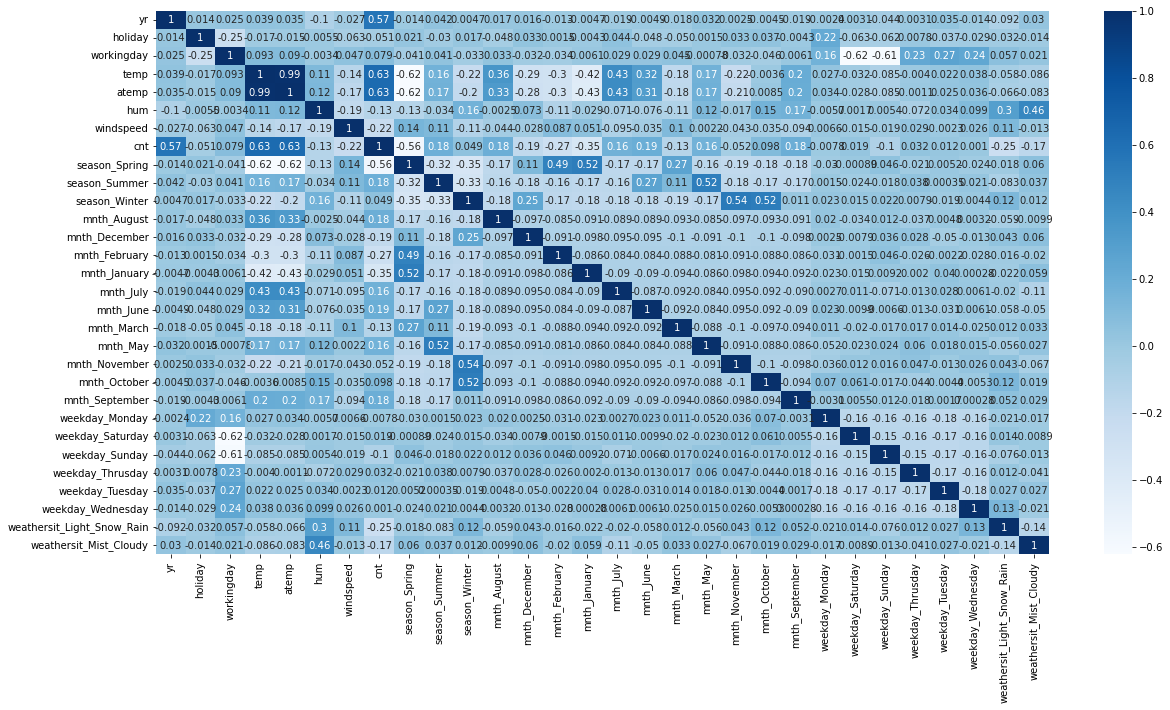

In [33]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="Blues")
plt.show()

## Step 6: Building Model Using RFE

### Deriving X and y sets from train

In [34]:
y_train = train.pop('cnt')
X_train = train

In [35]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
625,1,0,1,0.699946,0.628291,0.897172,0.829755,0,0,0,...,0,1,0,0,0,0,1,0,0,1
698,1,0,1,0.268136,0.303249,0.667952,0.042547,0,0,1,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,0.619121,0.589120,0.891602,0.291272,0,1,0,...,0,0,0,0,1,0,0,0,0,1
528,1,0,1,0.743127,0.690349,0.598543,0.792100,0,1,0,...,0,0,0,0,0,0,0,1,0,0
722,1,0,1,0.179078,0.215699,0.813680,0.091918,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [36]:
y_train.head()

625    0.466061
698    0.649563
134    0.521284
528    0.851243
722    0.103313
Name: cnt, dtype: float64

### Building RFE model

In [54]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe =RFE(lm,n_features_to_select=15)      # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 14),
 ('season_Winter', True, 1),
 ('mnth_August', False, 5),
 ('mnth_December', False, 7),
 ('mnth_February', False, 10),
 ('mnth_January', False, 11),
 ('mnth_July', True, 1),
 ('mnth_June', False, 9),
 ('mnth_March', True, 1),
 ('mnth_May', True, 1),
 ('mnth_November', False, 12),
 ('mnth_October', True, 1),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 4),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', False, 8),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 15),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [55]:
# Columns selected by RFE. We can start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_July', 'mnth_March', 'mnth_May', 'mnth_October',
       'mnth_September', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [57]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [58]:
X_train_rfe.head()

,yr,holiday,temp,atemp,hum,windspeed,season_Spring,season_Winter,mnth_July,mnth_March,mnth_May,mnth_October,mnth_September,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
625,1,0,0.699946,0.628291,0.897172,0.829755,0,0,0,0,0,0,1,0,1
698,1,0,0.268136,0.303249,0.667952,0.042547,0,1,0,0,0,0,0,0,0
134,0,0,0.619121,0.589120,0.891602,0.291272,0,0,0,0,1,0,0,0,1
528,1,0,0.743127,0.690349,0.598543,0.792100,0,0,0,0,0,0,0,0,0
722,1,0,0.179078,0.215699,0.813680,0.091918,1,0,0,0,0,0,0,0,1


### Building 1st model using statsmodel.api

In [59]:
# Adding a constant variable 
 
X_train_sm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_sm).fit()
# Print a summary of the linear regression model obtained
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          8.00e-188
Time:                        15:54:08   Log-Likelihood:                 509.05
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     494   BIC:                            -918.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3505      0.032     11.107      0.000       0.288       0.412
yr                             0.2340      0.008     28.668      0.000       0.218       0.250
holiday                       -0.0846      0.026     -3.301      0.001      -0.135      -0.034
temp                           0.3270      0.119      2.746      0.006       0.093       0.561
atemp                          0.1370      0.130      1.052      0.293      -0.119       0.393
hum                           -0.1896      0.038     -4.950      0.000      -0.265      -0.114
windspeed                     -0.1168      0.021     -5.463      0.000      -0.159      -0.075
season_Spring                 -0.1042      0.016     -6.562      0.000      -0.135      -0.073
season_Winter                  0.0412      0.015      2.773      0.006       0.012       0.070
mnth_July                     -0.0515      0.017     -2.945      0.003      -0.086      -0.017
mnth_March                     0.0381      0.015      2.535      0.012       0.009       0.068
mnth_May                       0.0538      0.017      3.178      0.002       0.021       0.087
mnth_October                   0.0610      0.017      3.515      0.000       0.027       0.095
mnth_September                 0.0764      0.016      4.843      0.000       0.045       0.107
weathersit_Light_Snow_Rain    -0.2071      0.025     -8.391      0.000      -0.256      -0.159
weathersit_Mist_Cloudy        -0.0544      0.010     -5.187      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       86.372   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.556
Skew:                          -0.823   Prob(JB):                     9.57e-53
Kurtosis:                       5.927   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
 X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

### Model 2

#### Rebuilding the model without holiday

In [75]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.50e-187
Time:                        16:50:26   Log-Likelihood:                 502.90
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     496   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3508      0.031     11.139      0.000       0.289       0.413
yr                             0.2335      0.008     28.325      0.000       0.217       0.250
temp                           0.4513      0.030     15.095      0.000       0.393       0.510
hum                           -0.1877      0.039     -4.859      0.000      -0.264      -0.112
windspeed                     -0.1166      0.021     -5.477      0.000      -0.158      -0.075
season_Spring                 -0.1056      0.016     -6.589      0.000      -0.137      -0.074
season_Winter                  0.0424      0.015      2.827      0.005       0.013       0.072
mnth_July                     -0.0538      0.018     -3.054      0.002      -0.088      -0.019
mnth_March                     0.0412      0.015      2.718      0.007       0.011       0.071
mnth_May                       0.0539      0.017      3.160      0.002       0.020       0.087
mnth_October                   0.0590      0.018      3.371      0.001       0.025       0.093
mnth_September                 0.0750      0.016      4.713      0.000       0.044       0.106
weathersit_Light_Snow_Rain    -0.2067      0.025     -8.315      0.000      -0.256      -0.158
weathersit_Mist_Cloudy        -0.0541      0.011     -5.106      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       96.558   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.085
Skew:                          -0.925   Prob(JB):                     1.23e-57
Kurtosis:                       5.985   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,306.40
1,temp,292.91
3,hum,23.55
4,windspeed,4.14
6,season_Winter,3.09
5,season_Spring,3.05
13,weathersit_Mist_Cloudy,2.20
0,yr,1.98
10,mnth_October,1.59
7,mnth_July,1.52


##### atemp has high p-value of 0.236 and high VIF value of 306.39. So dropping atemp from the model

In [72]:
X_train_new = X_train_new.drop(["atemp"], axis = 1)

### Model 3

#### Rebuilding the model without atemp.


In [74]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.50e-187
Time:                        16:49:45   Log-Likelihood:                 502.90
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     496   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3508      0.031     11.139      0.000       0.289       0.413
yr                             0.2335      0.008     28.325      0.000       0.217       0.250
temp                           0.4513      0.030     15.095      0.000       0.393       0.510
hum                           -0.1877      0.039     -4.859      0.000      -0.264      -0.112
windspeed                     -0.1166      0.021     -5.477      0.000      -0.158      -0.075
season_Spring                 -0.1056      0.016     -6.589      0.000      -0.137      -0.074
season_Winter                  0.0424      0.015      2.827      0.005       0.013       0.072
mnth_July                     -0.0538      0.018     -3.054      0.002      -0.088      -0.019
mnth_March                     0.0412      0.015      2.718      0.007       0.011       0.071
mnth_May                       0.0539      0.017      3.160      0.002       0.020       0.087
mnth_October                   0.0590      0.018      3.371      0.001       0.025       0.093
mnth_September                 0.0750      0.016      4.713      0.000       0.044       0.106
weathersit_Light_Snow_Rain    -0.2067      0.025     -8.315      0.000      -0.256      -0.158
weathersit_Mist_Cloudy        -0.0541      0.011     -5.106      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       96.558   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.085
Skew:                          -0.925   Prob(JB):                     1.23e-57
Kurtosis:                       5.985   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF value for Model 3 features

In [76]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.68
1,temp,13.63
3,windspeed,4.10
4,season_Spring,3.04
5,season_Winter,3.04
12,weathersit_Mist_Cloudy,2.19
0,yr,1.98
9,mnth_October,1.59
6,mnth_July,1.51
8,mnth_May,1.32


#### Checking VIF value for Model 4 features

In [89]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.68
1,temp,13.63
3,windspeed,4.10
4,season_Spring,3.04
5,season_Winter,3.04
12,weathersit_Mist_Cloudy,2.19
0,yr,1.98
9,mnth_October,1.59
6,mnth_July,1.51
8,mnth_May,1.32


##### In Model 4, we have p-value 0.000 for most of the fatures and 0.002 for only 1 feature. So we will check the high VIF value for dropping the feature. the column 'hum' as high VIF value of 22.17, So dropping 'hum' from the Model 4

In [90]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### Model 5

#### Rebuilding the model without 'hum' feature

In [92]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          9.94e-184
Time:                        17:18:02   Log-Likelihood:                 491.05
No. Observations:                 510   AIC:                            -956.1
Df Residuals:                     497   BIC:                            -901.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2493      0.024     10.346      0.000       0.202       0.297
yr                             0.2389      0.008     28.610      0.000       0.222       0.255
temp                           0.4238      0.030     14.119      0.000       0.365       0.483
windspeed                     -0.0924      0.021     -4.367      0.000      -0.134      -0.051
season_Spring                 -0.1140      0.016     -6.997      0.000      -0.146      -0.082
season_Winter                  0.0315      0.015      2.077      0.038       0.002       0.061
mnth_July                     -0.0479      0.018     -2.666      0.008      -0.083      -0.013
mnth_March                     0.0464      0.015      2.998      0.003       0.016       0.077
mnth_May                       0.0394      0.017      2.299      0.022       0.006       0.073
mnth_October                   0.0555      0.018      3.104      0.002       0.020       0.091
mnth_September                 0.0660      0.016      4.084      0.000       0.034       0.098
weathersit_Light_Snow_Rain    -0.2609      0.023    -11.492      0.000      -0.306      -0.216
weathersit_Mist_Cloudy        -0.0836      0.009     -9.410      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       95.892   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.817
Skew:                          -0.929   Prob(JB):                     1.26e-55
Kurtosis:                       5.906   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking the VIF values for model 5 features

In [93]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.90
2,windspeed,4.04
0,yr,1.98
4,season_Winter,1.97
3,season_Spring,1.80
8,mnth_October,1.57
11,weathersit_Mist_Cloudy,1.56
5,mnth_July,1.49
9,mnth_September,1.28
7,mnth_May,1.25


##### Based on the model 5 VIF values, 'temp' and 'workingday' has values more than 5 (5.98 and 5.15 respectively). Based on our initial analysis, we found that 'temp' has a correlation 63% with 'cnt' and 'workingday' has correlation of 6.3%. Hence, it makes more sense to drop 'workingday' and check the VIF again.

### Model 6

#### Rebuilding the model after dropping 'workingday'

In [96]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          9.94e-184
Time:                        17:21:06   Log-Likelihood:                 491.05
No. Observations:                 510   AIC:                            -956.1
Df Residuals:                     497   BIC:                            -901.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2493      0.024     10.346      0.000       0.202       0.297
yr                             0.2389      0.008     28.610      0.000       0.222       0.255
temp                           0.4238      0.030     14.119      0.000       0.365       0.483
windspeed                     -0.0924      0.021     -4.367      0.000      -0.134      -0.051
season_Spring                 -0.1140      0.016     -6.997      0.000      -0.146      -0.082
season_Winter                  0.0315      0.015      2.077      0.038       0.002       0.061
mnth_July                     -0.0479      0.018     -2.666      0.008      -0.083      -0.013
mnth_March                     0.0464      0.015      2.998      0.003       0.016       0.077
mnth_May                       0.0394      0.017      2.299      0.022       0.006       0.073
mnth_October                   0.0555      0.018      3.104      0.002       0.020       0.091
mnth_September                 0.0660      0.016      4.084      0.000       0.034       0.098
weathersit_Light_Snow_Rain    -0.2609      0.023    -11.492      0.000      -0.306      -0.216
weathersit_Mist_Cloudy        -0.0836      0.009     -9.410      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       95.892   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.817
Skew:                          -0.929   Prob(JB):                     1.26e-55
Kurtosis:                       5.906   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking the VIF values for model 6 features

In [100]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.90
2,windspeed,4.04
0,yr,1.98
4,season_Winter,1.97
3,season_Spring,1.80
8,mnth_October,1.57
11,weathersit_Mist_Cloudy,1.56
5,mnth_July,1.49
9,mnth_September,1.28
7,mnth_May,1.25


### Model 7

In [106]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          9.94e-184
Time:                        17:30:13   Log-Likelihood:                 491.05
No. Observations:                 510   AIC:                            -956.1
Df Residuals:                     497   BIC:                            -901.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2493      0.024     10.346      0.000       0.202       0.297
yr                             0.2389      0.008     28.610      0.000       0.222       0.255
temp                           0.4238      0.030     14.119      0.000       0.365       0.483
windspeed                     -0.0924      0.021     -4.367      0.000      -0.134      -0.051
season_Spring                 -0.1140      0.016     -6.997      0.000      -0.146      -0.082
season_Winter                  0.0315      0.015      2.077      0.038       0.002       0.061
mnth_July                     -0.0479      0.018     -2.666      0.008      -0.083      -0.013
mnth_March                     0.0464      0.015      2.998      0.003       0.016       0.077
mnth_May                       0.0394      0.017      2.299      0.022       0.006       0.073
mnth_October                   0.0555      0.018      3.104      0.002       0.020       0.091
mnth_September                 0.0660      0.016      4.084      0.000       0.034       0.098
weathersit_Light_Snow_Rain    -0.2609      0.023    -11.492      0.000      -0.306      -0.216
weathersit_Mist_Cloudy        -0.0836      0.009     -9.410      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       95.892   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.817
Skew:                          -0.929   Prob(JB):                     1.26e-55
Kurtosis:                       5.906   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking the VIF value of model 7 features

In [107]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.90
2,windspeed,4.04
0,yr,1.98
4,season_Winter,1.97
3,season_Spring,1.80
8,mnth_October,1.57
11,weathersit_Mist_Cloudy,1.56
5,mnth_July,1.49
9,mnth_September,1.28
7,mnth_May,1.25


## Step 7: Residual Analysis of the Train data  

### Predicting demand from final model

In [108]:
y_train_pred = lm.predict(X_train_lm)

### Plotting the error terms

Text(0.5, 0, 'Errors')

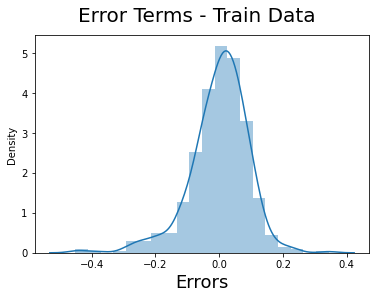

In [109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms - Train Data', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

##### The error terms plot shows that the error terms are normally distributed

Text(0, 0.5, 'y predicted')

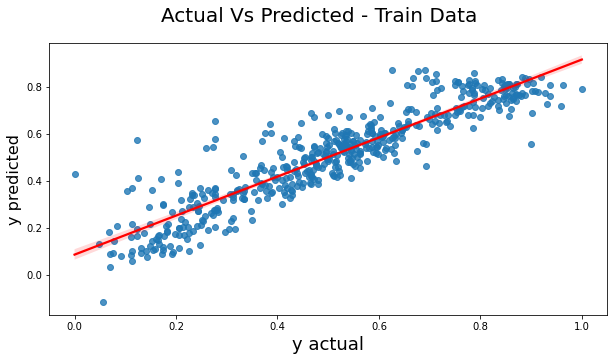

In [110]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,5))
sns.regplot(x=y_train, y=y_train_pred, fit_reg=True, line_kws={"color": "red"})
fig.suptitle('Actual Vs Predicted - Train Data', fontsize = 20)              # Plot heading 
plt.xlabel('y actual', fontsize = 18)                          # X-label
plt.ylabel('y predicted', fontsize = 16) 

## Step 8: Making predictions using final model

### Applying scaling on test data

In [111]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
637,1,0,0,0.571511,0.564409,0.599828,0.243845,0.790037,0,0,...,0,1,0,0,1,0,0,0,0,0
305,0,0,1,0.373321,0.392549,0.739075,0.104712,0.479061,0,0,...,0,0,0,0,0,0,0,1,0,0
606,1,0,1,0.810668,0.746492,0.607113,0.091619,0.884837,0,0,...,0,0,0,0,0,1,0,0,0,0
580,1,0,0,0.925816,0.879215,0.630677,0.566238,0.782559,0,0,...,0,0,0,1,0,0,0,0,0,0
302,0,0,0,0.295817,0.299829,0.641388,0.353482,0.380695,0,0,...,1,0,0,0,1,0,0,0,0,0


In [112]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.511416,0.036530,0.616438,0.547916,0.523530,0.629939,0.395522,0.535483,0.237443,0.296804,...,0.077626,0.077626,0.146119,0.168950,0.178082,0.155251,0.100457,0.146119,0.009132,0.305936
std,0.501015,0.188034,0.487367,0.240049,0.216250,0.147360,0.206915,0.215590,0.426491,0.457896,...,0.268194,0.268194,0.354034,0.375566,0.383458,0.362974,0.301297,0.354034,0.095344,0.461858
min,0.000000,0.000000,0.000000,-0.049680,-0.026641,0.193231,-0.052405,0.047055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.349516,0.346192,0.519923,0.256105,0.390474,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.563760,0.546542,0.628535,0.371475,0.533709,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.762504,0.708229,0.750214,0.499177,0.698746,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.016608,0.951509,0.948586,1.224196,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Deriving X and y data from Test data

In [113]:
y_test = test.pop('cnt')
X_test = test

In [114]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
637,1,0,0,0.571511,0.564409,0.599828,0.243845,0,0,1,...,0,1,0,0,1,0,0,0,0,0
305,0,0,1,0.373321,0.392549,0.739075,0.104712,0,0,1,...,0,0,0,0,0,0,0,1,0,0
606,1,0,1,0.810668,0.746492,0.607113,0.091619,0,0,0,...,0,0,0,0,0,1,0,0,0,0
580,1,0,0,0.925816,0.879215,0.630677,0.566238,0,0,0,...,0,0,0,1,0,0,0,0,0,0
302,0,0,0,0.295817,0.299829,0.641388,0.353482,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [115]:
y_test.head()

637    0.790037
305    0.479061
606    0.884837
580    0.782559
302    0.380695
Name: cnt, dtype: float64

### Extracting only required columns from test based on model 7 (final model)

In [116]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 637 to 550
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   temp                        219 non-null    float64
 3   windspeed                   219 non-null    float64
 4   season_Spring               219 non-null    uint8  
 5   season_Winter               219 non-null    uint8  
 6   mnth_July                   219 non-null    uint8  
 7   mnth_March                  219 non-null    uint8  
 8   mnth_May                    219 non-null    uint8  
 9   mnth_October                219 non-null    uint8  
 10  mnth_September              219 non-null    uint8  
 11  weathersit_Light_Snow_Rain  219 non-null    uint8  
 12  weathersit_Mist_Cloudy      219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(9)

### Making predictions from the final model

In [117]:
y_pred = lm.predict(X_test)

## Step 9: Model Evaluation

### R-Square for test data

In [118]:
# R-square value for test

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8159039683140238

### MSE (Mean Squared Error)

In [119]:
mse = mean_squared_error(y_test, y_pred)
mse

0.008517550956105095

### Error terms - Test data

Text(0.5, 0, 'Errors')

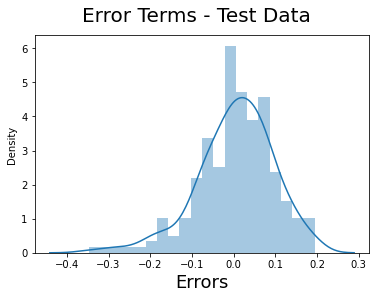

In [120]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms - Test Data', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Plotting Actual vs Predicted Values

Text(0, 0.5, 'y predicted')

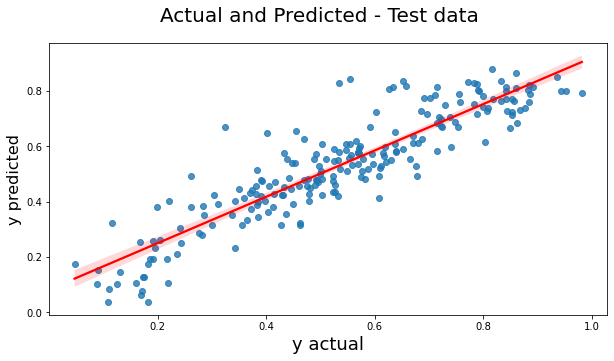

In [121]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred, fit_reg=True, line_kws={"color": "red"})
fig.suptitle('Actual and Predicted - Test data', fontsize = 20)              # Plot heading 
plt.xlabel('y actual', fontsize = 18)                          # X-label
plt.ylabel('y predicted', fontsize = 16) 

### Plotting Actual and Predicted values

Text(0, 0.5, 'Counts')

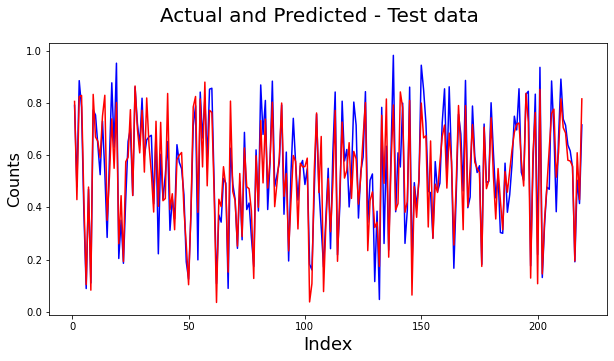

In [122]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test, color="blue", linestyle="-")
plt.plot(c,y_pred, color="red", linestyle="-")
fig.suptitle('Actual and Predicted - Test data', fontsize=20)              
plt.xlabel('Index', fontsize=18)                              
plt.ylabel('Counts', fontsize=16) 

### Plotting Error terms

Text(0, 0.5, 'Counts - Predicted Counts')

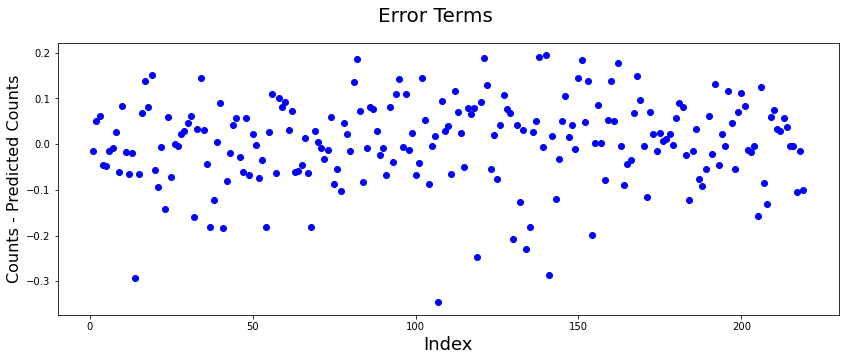

In [123]:
c = [i for i in range(1,220)]
fig = plt.figure(figsize=(14,5))
plt.plot(c, y_test-y_pred, color="blue", marker = 'o', linestyle = "")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('Counts - Predicted Counts', fontsize=16)    

##### All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient and with increase in temp, cnt will increase.
- Followed by season winter which influence demand (cnt) in positive way. However Spring season is predicted to have least demand.
- Bike rentals is less for the month of november and july.
- The rentals reduce Mist and Cloudy weather and Light Snow and Rain weather patterns.
- Windspeed also has negative impact on the demand.


This indicates that the bike rentals is majorly affected by temperature, season, month, weather conditions and windspeed.